Assignment 6: Knock airport Weather
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature

The mean temperature each day

The mean temperature for each month 

60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column) 

The rolling windspeed (say over 24 hours) 

The max windspeed for each day 

The monthly mean of the daily max windspeeds (yer I am being nasty here) 

You do not need to over comment your code. Marks will be given for how nice the plots are.

In [60]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data.
# add skiprows to skip the metadata at the top of the file.
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows=23)

# Inspect the data.
df.head(5)


C:\Users\laura\AppData\Local\Temp\ipykernel_22264\1062867092.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


When looking at the excel file of the downloaded data set. The meta data at the top is a key for each column and what data it represents. For this assignment, we are looking at the column "temp" for Air Temperature.



date:  -  Date and Time (utc)

rain:  -  Precipitation Amount (mm)	

temp: -  Air Temperature (C)	

wetb:  -  Wet Bulb Temperature (C)		

dewpt: -  Dew Point Temperature (C)       

rhum:  -  Relative Humidity (%)			

vappr: -  Vapour Pressure (hPa)	 	

msl:   -  Mean Sea Level Pressure (hPa)	

wdsp:  -  Mean Wind Speed (knot)			

wddir: -  Predominant Wind Direction (degree)		

ww:    -  Synop code for Present Weather	

w:     -  Synop code for Past Weather	

sun:   -  Sunshine duration (hours)		

vis:   -  Visibility (m)		

clht:  -  Cloud height (100's of ft) - 999 if none 	

clamt: -  Cloud amount	

ind:   -  Indicator			


References - add context 


[Pandas Documentation: Usecols](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#:~:text=usecolsSequence%20of%20Hashable%20or%20Callable%2C%20optional)

I only looked at year 2023 for this assignment as too much data was clustering the plots. Felt a year was a good amount of time for a  sample size 

I used [ChatGBT](https://chatgpt.com/s/t_6918ad2bef388191bbcc7e2785bb8d07) to assist with the code for filtering the data by year.

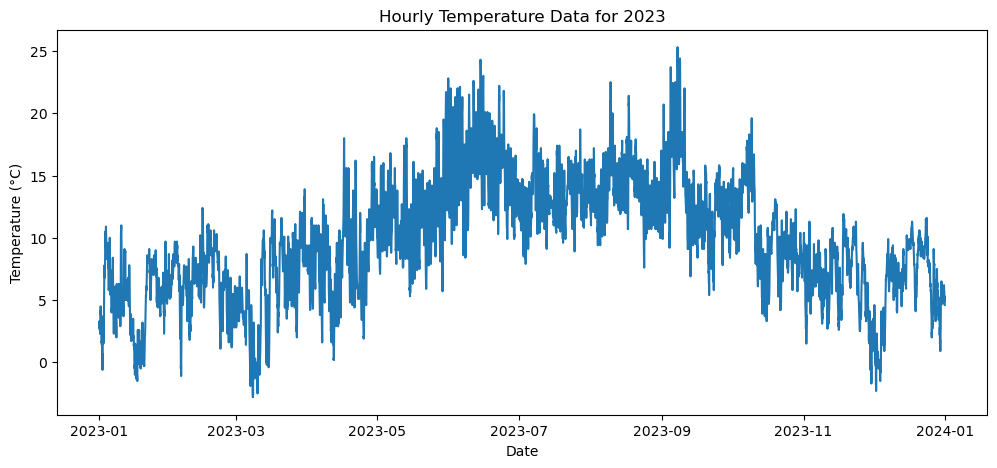

In [61]:
# Plot the temperature data.
# Looking only at the 'date' and 'temp' columns for plotting.
columns = ['date','temp']

# Reload the data with only the necessary columns.
# usecols to limit the data read into memory
df = pd.read_csv(url, usecols=columns, skiprows=23)


# Convert 'date' column to datetime.
# The date format in the data is 'DD-MMM-YYYY HH:MM'
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Filtered by one year for better visualization.

# Too plot the entire dataset was too cluttered.
year = 2023

# Create a new DataFrame for the selected year.
df_year = df[df['date'].dt.year == year]

# Plot using seaborn and matplotlib. 

plt.figure(figsize=(12,5))
sns.lineplot(data=df_year, x='date', y='temp')
plt.title(f'Hourly Temperature Data for {year}')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

In [62]:
# Calculate the daily mean temperature.
# look a lecture 2 notes and add more context 


daily_mean = (df_year.set_index('date').resample('D')['temp'].mean().reset_index())

# Take a look at the daily mean before plotting.
print(daily_mean)

          date      temp
0   2023-01-01  2.983333
1   2023-01-02  1.595833
2   2023-01-03  8.229167
3   2023-01-04  8.625000
4   2023-01-05  7.566667
..         ...       ...
360 2023-12-27  6.258333
361 2023-12-28  5.783333
362 2023-12-29  3.854167
363 2023-12-30  4.420833
364 2023-12-31  5.487500

[365 rows x 2 columns]


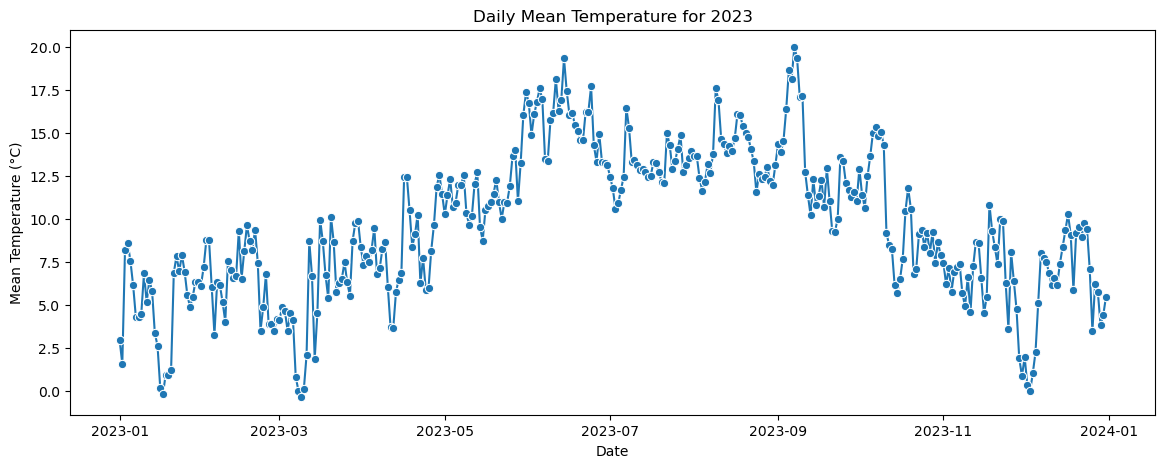

In [63]:
# Plot the daily mean.

plt.figure(figsize=(14,5))
sns.lineplot(data=daily_mean, x='date', y='temp', marker='o')
plt.title(f'Daily Mean Temperature for {year}')
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.show()

In [64]:
# Compute monthly mean temperature.
monthly_mean = (df_year.set_index('date').resample('M')['temp'].mean().reset_index())

# Take a look at the monthly mean before plotting.
print(monthly_mean)

         date       temp
0  2023-01-31   4.941398
1  2023-02-28   6.502679
2  2023-03-31   5.647715
3  2023-04-30   8.233056
4  2023-05-31  11.681048
5  2023-06-30  15.705972
6  2023-07-31  13.127554
7  2023-08-31  13.805108
8  2023-09-30  13.305139
9  2023-10-31  10.075000
10 2023-11-30   6.635972
11 2023-12-31   6.248118


C:\Users\laura\AppData\Local\Temp\ipykernel_22264\1820388700.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = (df_year.set_index('date').resample('M')['temp'].mean().reset_index())


Text(0, 0.5, 'Monthly Mean Temperature (°C)')

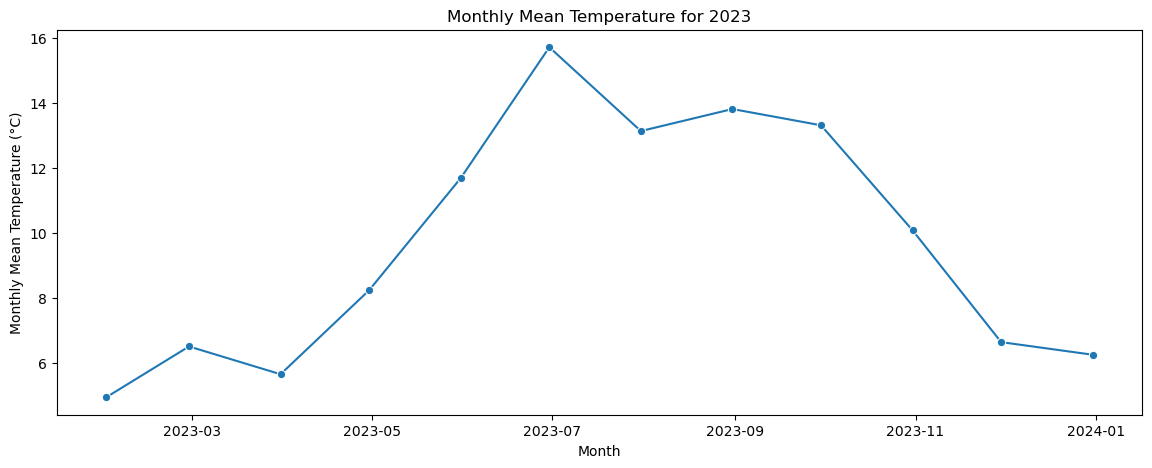

In [65]:
# Plot the monthly mean. 
plt.figure(figsize=(14,5))
sns.lineplot(data=monthly_mean, x='date', y='temp', marker='o')
plt.title(f'Monthly Mean Temperature for {year}')
plt.xlabel("Month")
plt.ylabel("Monthly Mean Temperature (°C)")